# Stroke Prediction Using Machine Learning

## Problem Statement:-

### Preforming a Predictive Analysis Approch to predict the stroke using various Machine Learning Algorihms.
    
    

In [1]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


## Importing the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing the data

In [3]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Dataset Information

### According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
### This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.

**id**: unique identifier

**gender**: "Male", "Female" or "Other"

**age**: age of the patient

**hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

**heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

**ever_married**: "No" or "Yes"

**work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

**avg_glucose_level**: average glucose level in blood

**bmi**: body mass index

**smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*

**stroke**: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


## Looking at the top part of the data

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Looking at the bottom part of the data

In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.shape

(5110, 12)

### Here in our data we have around 5110 Columns and 12 Rows

### bmi has 201 null values

In [8]:
df.isnull().sum()         

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Treating the Null Values

### **From the above data we can see that we have 201 null values in the bmi cloumn which has to be treated.**

### **Here bmi is a continous variable.**

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Null values are treated in the bmi column

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Data Visualization of cloumns using pairpot

<function matplotlib.pyplot.show(close=None, block=None)>

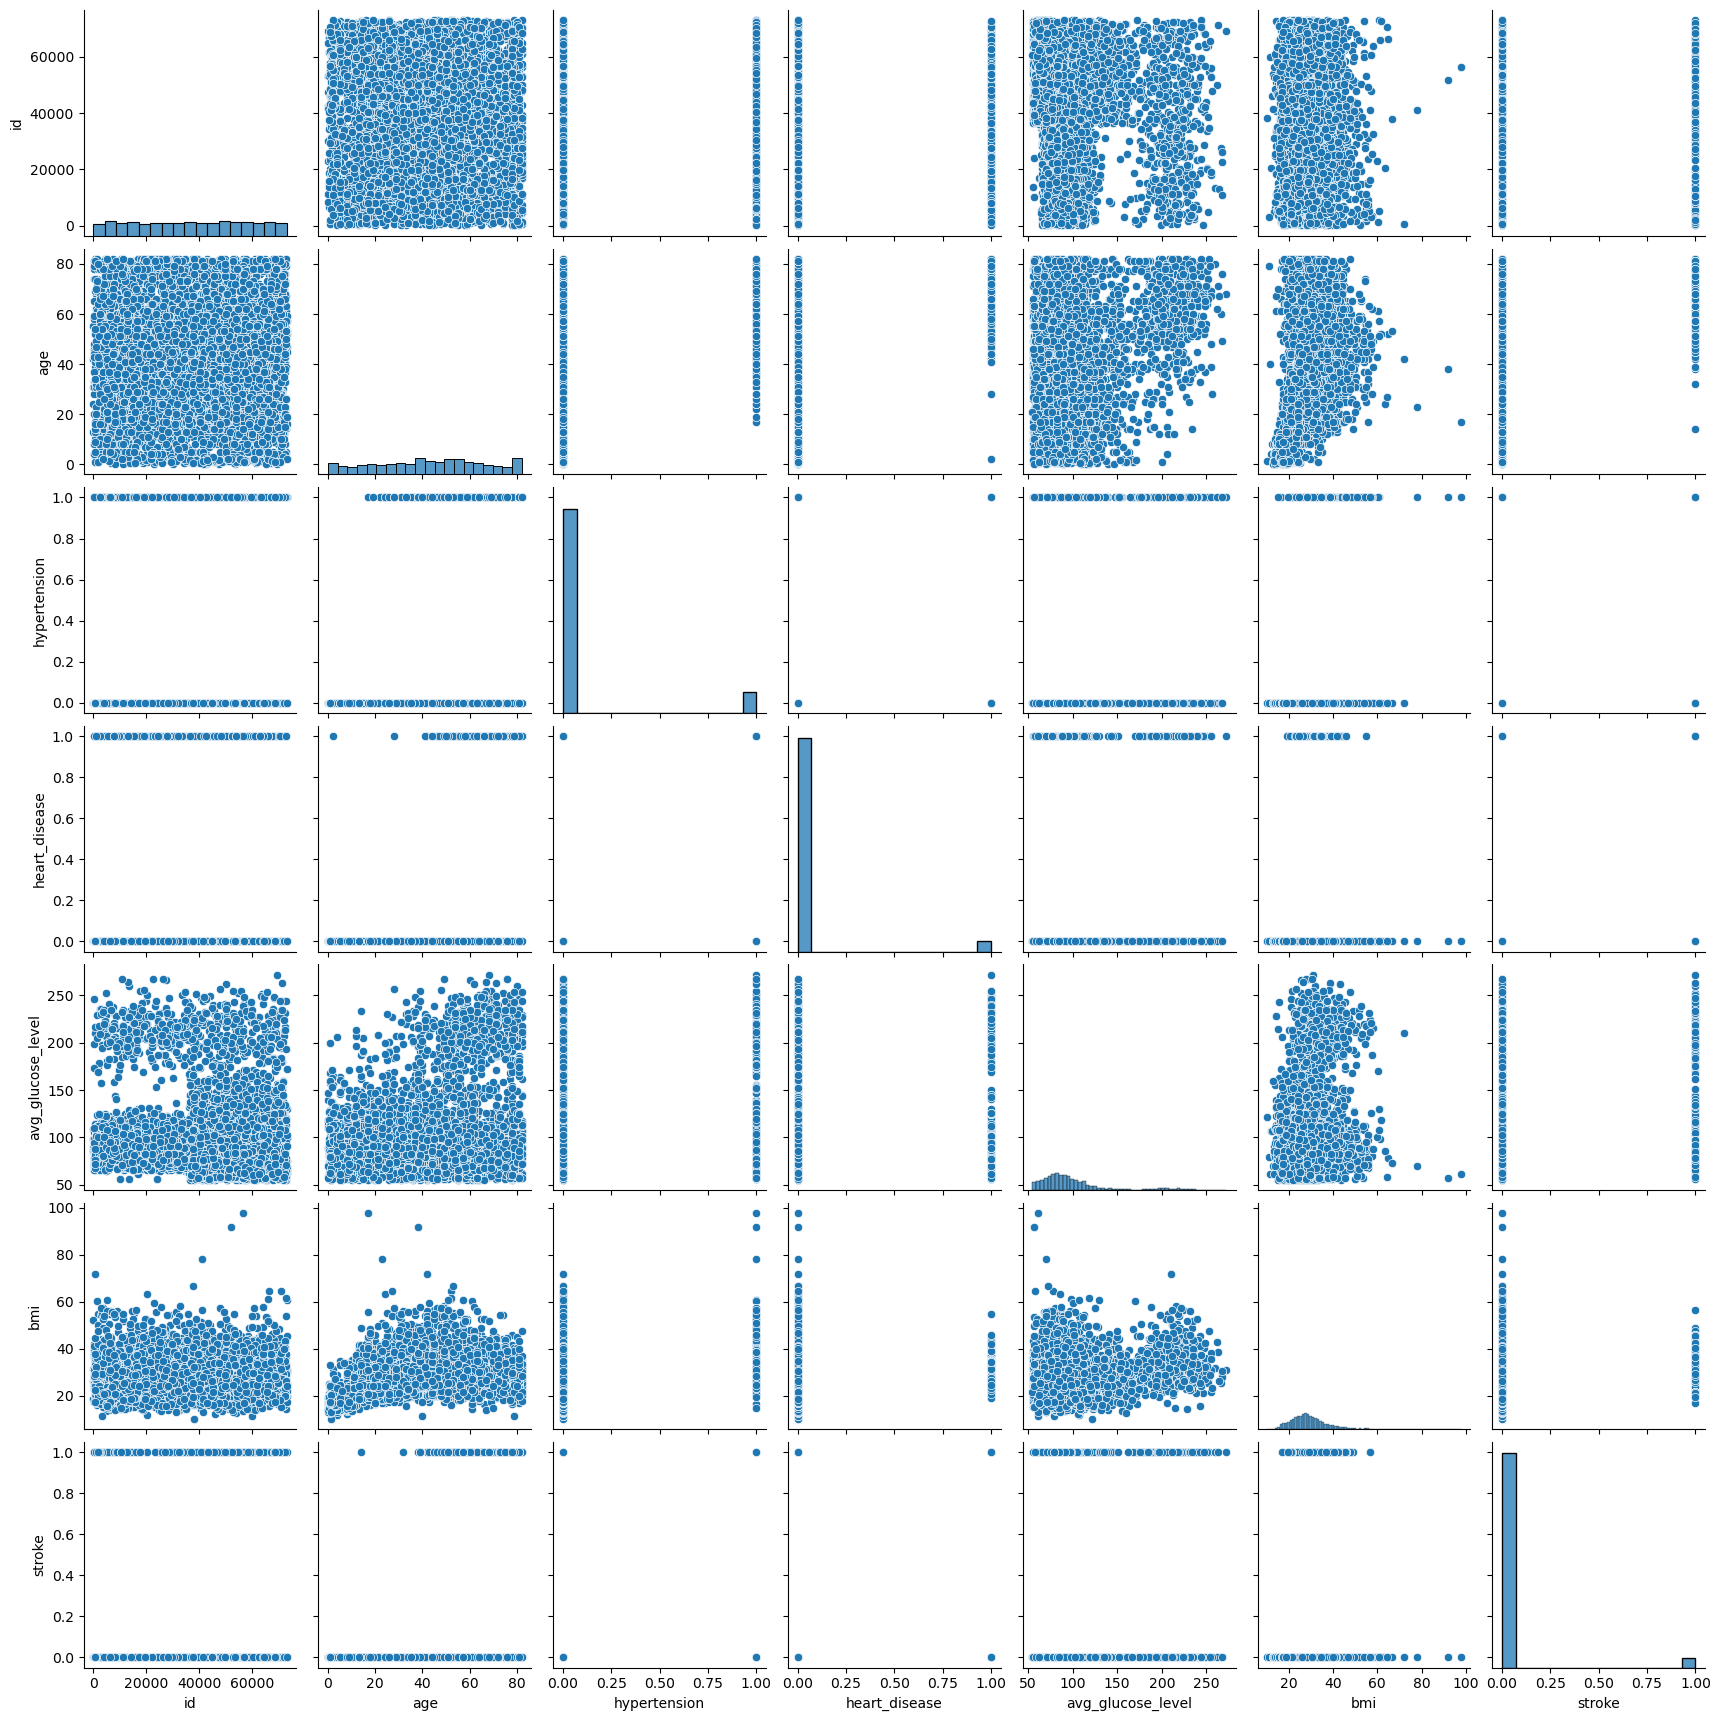

In [13]:
sns.pairplot(df)
plt.show

## Diving the data into continous and categorical variables.

### Categorical Variables:-

#### - gender
#### - hypertension
#### - heart_disease
#### - ever_married
#### - work_type
#### - residance_type
#### - smoking_status

### Continous Variables:-

#### - age
#### - avg_glucose_level
#### - bmi



# Categorical Variables

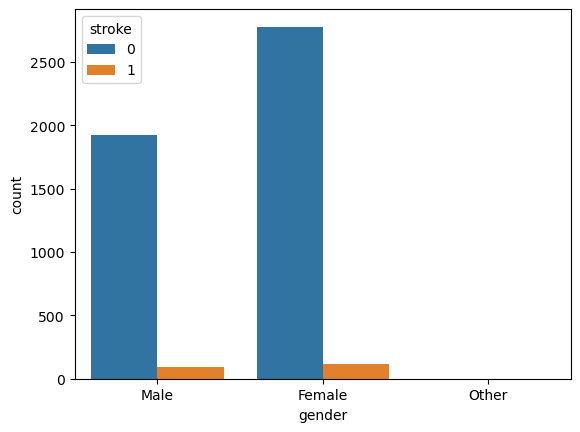

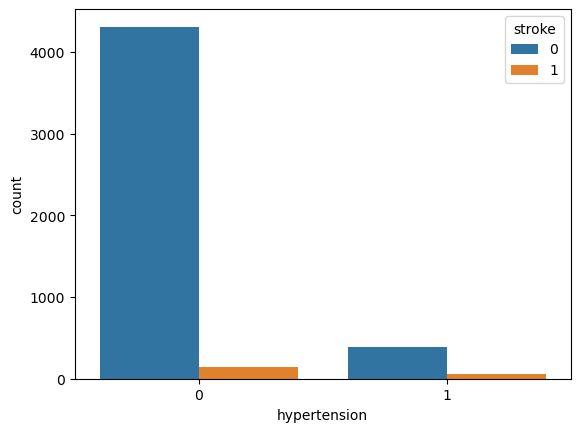

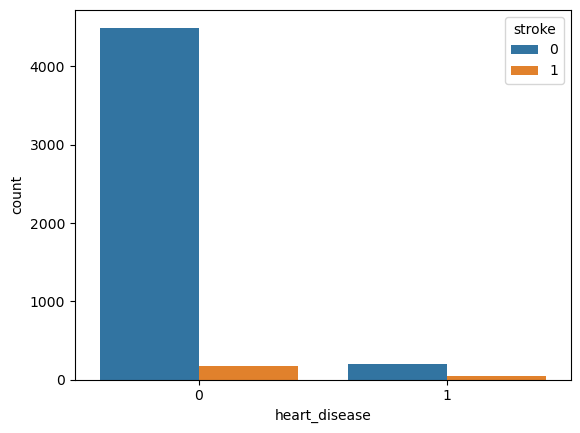

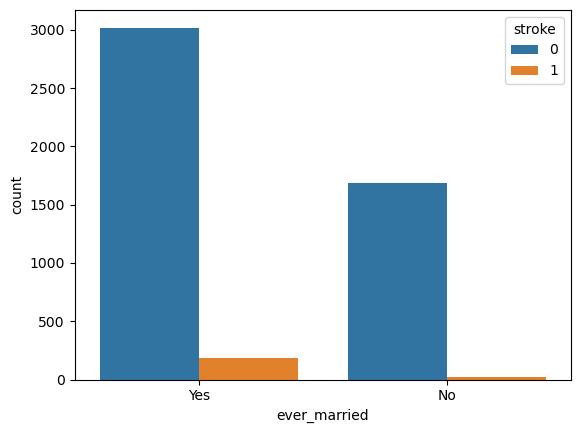

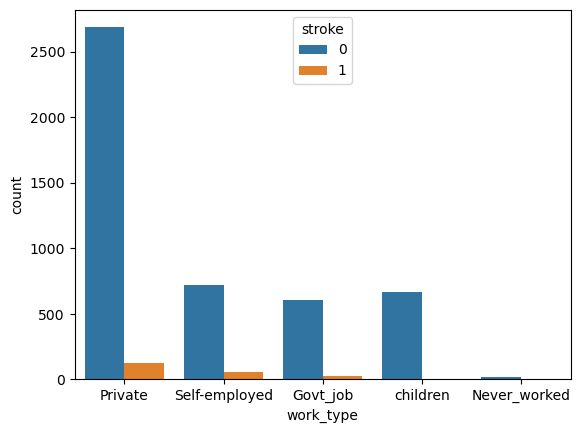

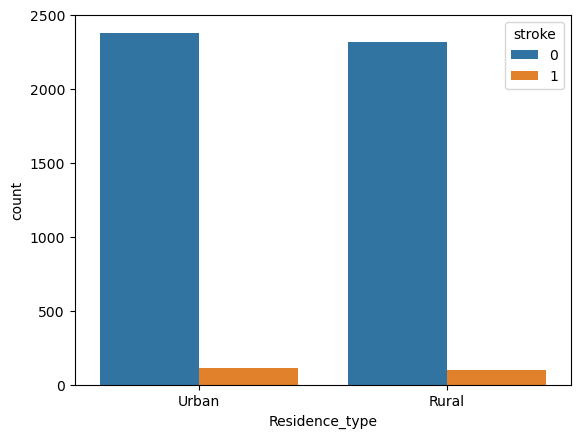

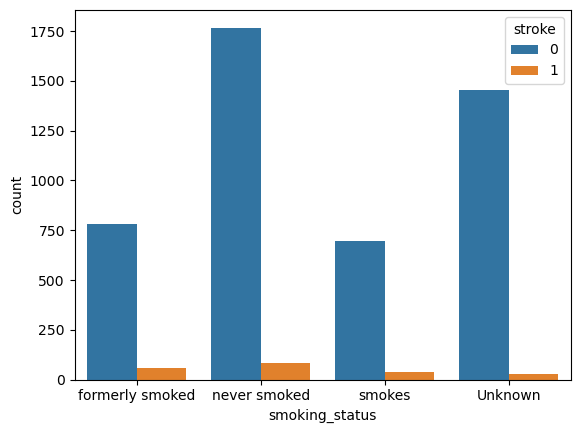

In [14]:
categorical = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
for i in categorical:
    sns.countplot(df[i],hue=df['stroke'])
    plt.show()

# Continous Variables

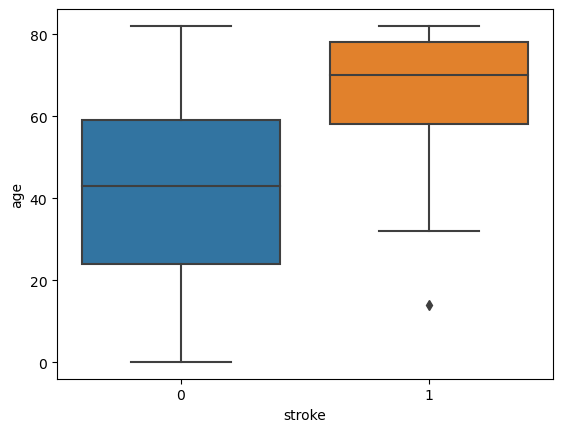

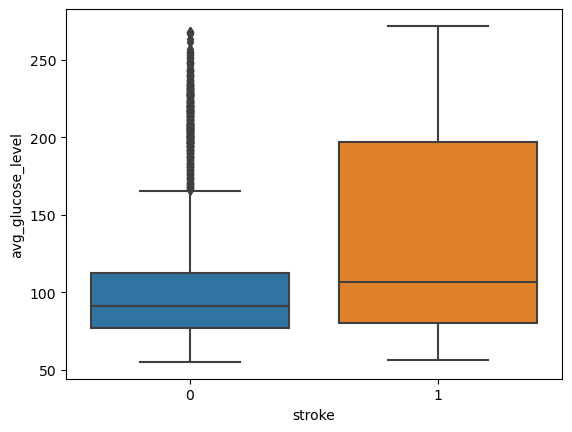

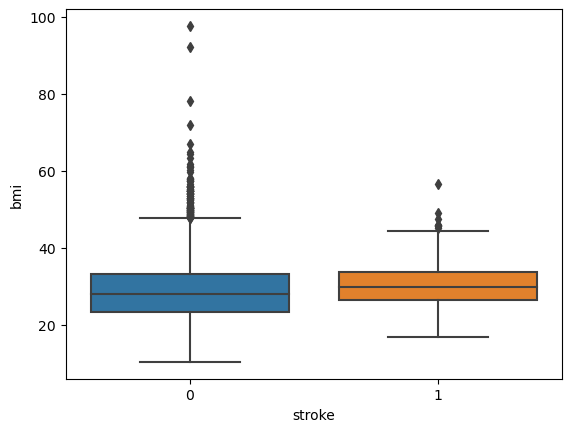

In [15]:
continuous = ['age', 'avg_glucose_level', 'bmi']

for i in continuous:
    sns.boxplot(x = df['stroke'], y = df[i])
    plt.show()

In [16]:
plt.boxplot(df['age'])


{'whiskers': [<matplotlib.lines.Line2D at 0x16dc32d6640>,
 'caps': [<matplotlib.lines.Line2D at 0x16dc32d6be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16dc32d6370>],
 'medians': [<matplotlib.lines.Line2D at 0x16dc32e51c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16dc32e5490>],
 'means': []}

In [17]:
sns.boxplot(df['avg_glucose_level'])

<AxesSubplot:xlabel='avg_glucose_level'>

In [18]:
percentile25 = df['avg_glucose_level'].quantile(0.25)
percentile75 = df['avg_glucose_level'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  113.57
25th quartile:  77.07


In [19]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  36.5


In [20]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 168.32
Lower limit 22.319999999999993


In [21]:
new_df = df[df['avg_glucose_level'] < upper_limit]
new_df.shape

(4342, 12)

In [22]:
new_df = df[(df.avg_glucose_level>lower_limit)&(df.avg_glucose_level<upper_limit)]
new_df.shape

(4342, 12)

In [23]:
sns.boxplot(new_df['avg_glucose_level'])

<AxesSubplot:xlabel='avg_glucose_level'>

In [24]:
df['avg_glucose_level'].value_counts().loc[lambda x : x>0.3]

93.88     6
72.49     5
83.16     5
73.00     5
91.68     5
         ..
72.06     1
97.90     1
230.59    1
224.63    1
85.28     1
Name: avg_glucose_level, Length: 3852, dtype: int64

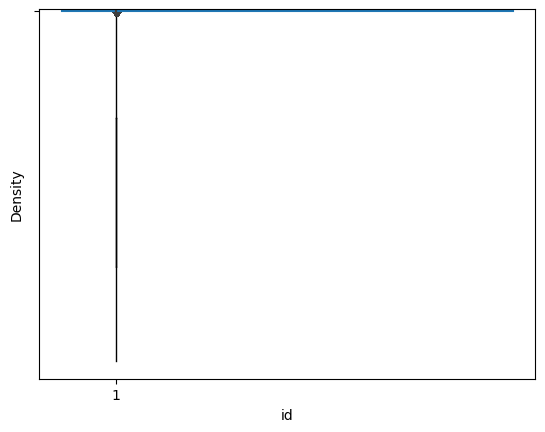

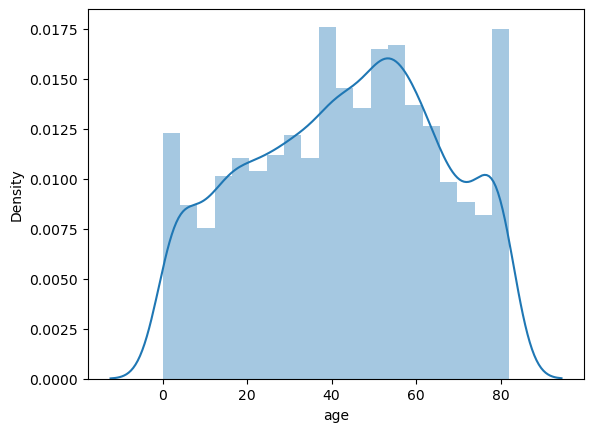

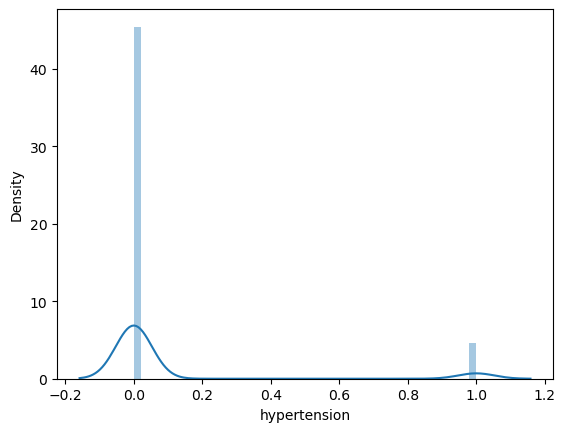

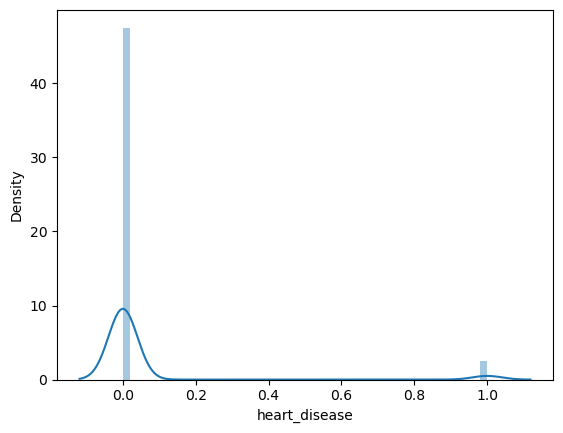

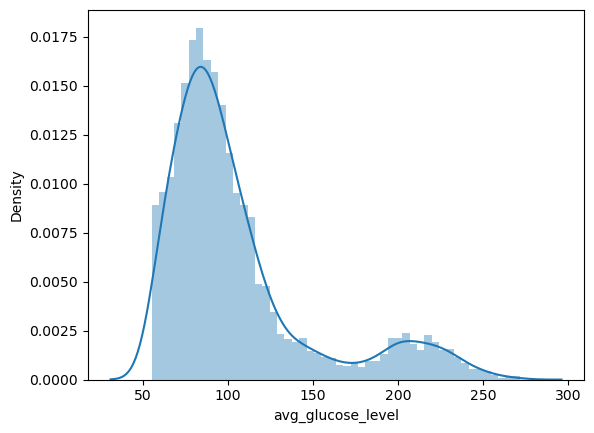

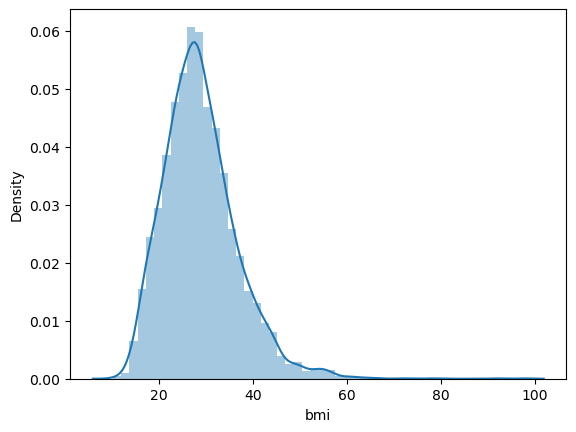

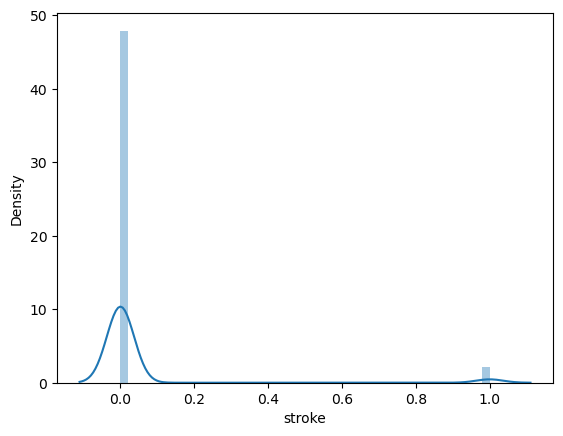

In [25]:
cat = []
num = []
for i in df.columns:
    if df[i].dtypes == object:
        cat.append(i)
    else :
        num.append(i)
for i in num:
    sns.distplot(df[i])
    plt.show()

In [26]:
df["hypertension"].value_counts().plot(kind="bar")

<AxesSubplot:>

In [27]:
df["work_type"].value_counts().plot(kind="bar")

<AxesSubplot:>

In [28]:
df["heart_disease"].value_counts().plot(kind="bar")

<AxesSubplot:>

In [29]:
df["ever_married"].value_counts().plot(kind="bar")

<AxesSubplot:>

In [30]:
df["smoking_status"].value_counts().plot(kind="bar")

<AxesSubplot:>

In [31]:
sns.boxplot(df["stroke"],df["age"])

<AxesSubplot:xlabel='stroke', ylabel='age'>

In [32]:
df["stroke"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='stroke', ylabel='age'>

In [33]:
sns.barplot(df["work_type"],df["age"],hue=df["stroke"],ci=None)


<AxesSubplot:xlabel='work_type', ylabel='age'>

In [34]:
sns.barplot(df["Residence_type"],df["age"],hue=df["stroke"],ci=None)

<AxesSubplot:xlabel='Residence_type', ylabel='age'>

In [35]:
sns.barplot(df["smoking_status"],df["age"],hue=df["stroke"],ci=None)

<AxesSubplot:xlabel='smoking_status', ylabel='age'>

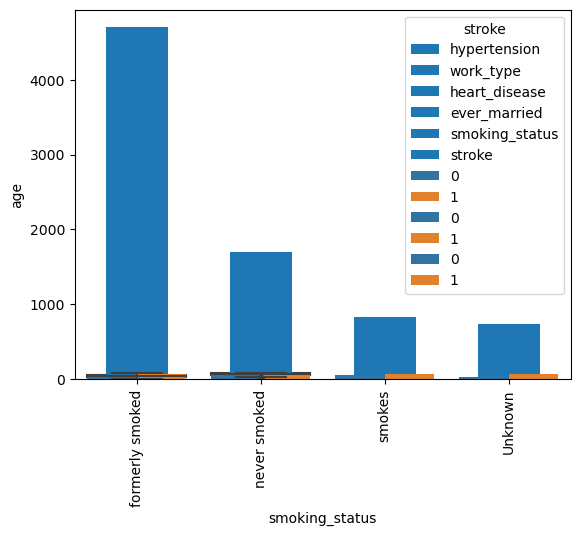

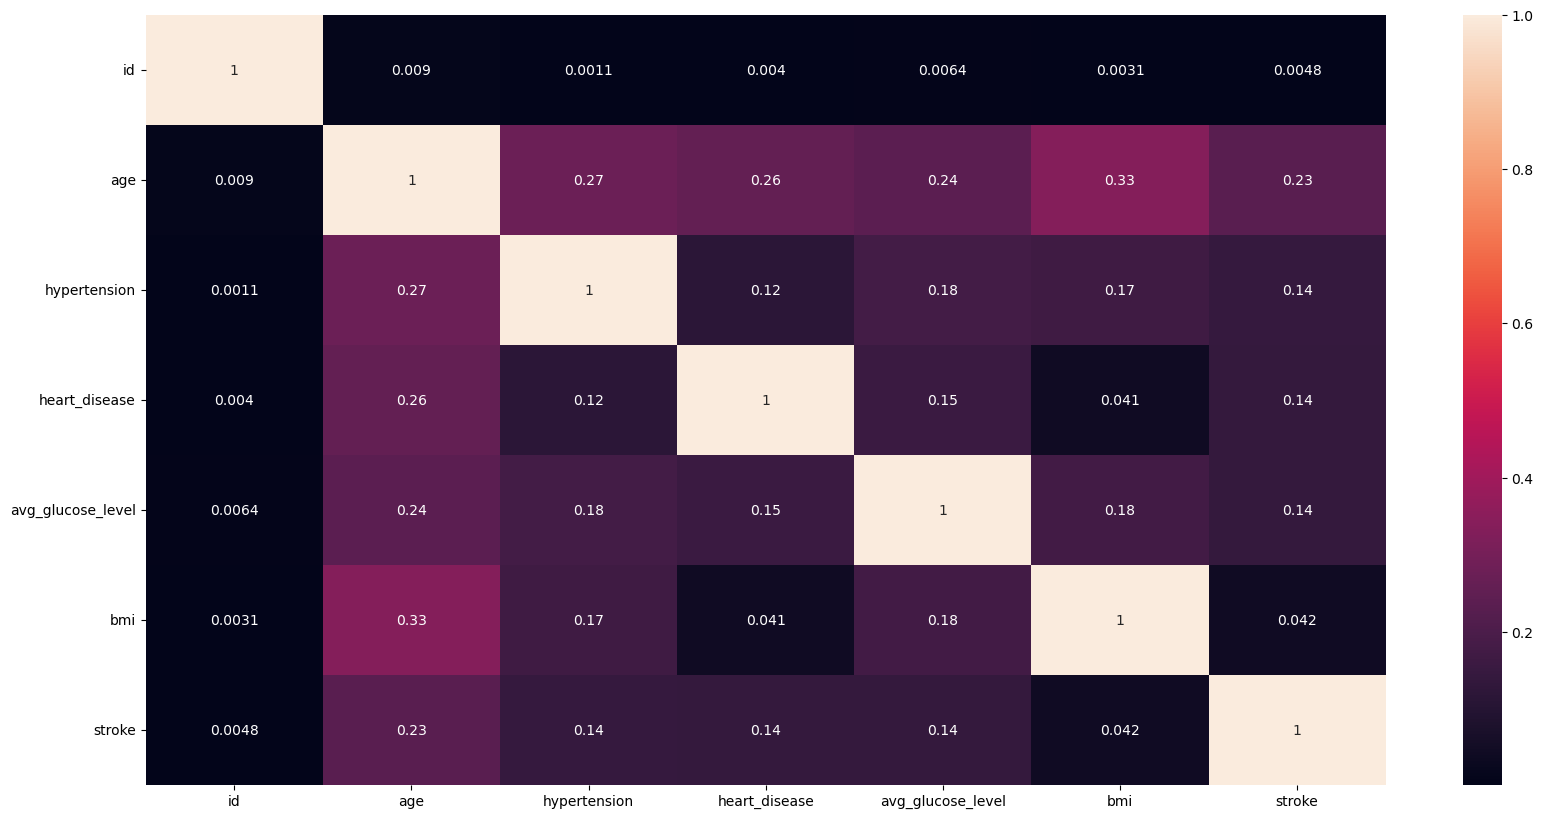

In [36]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

## Insights

- From the correlation function and heatmap we can see there is not much correlation between variables. Stroke has highest positive correlation with age (0.23) and has a positive correlation with heart_disease(0.14), hypertension (0.14), avg_glucose_level (0.14). And almost neglible correlation with bmi (0.042).

- Some continuous data which are having some correlation between each other-
    - age and bmi (0.33)
    - age and avg_glucose_level (0.24)

we will plot scatterplot to know more about there relationship.

- Some categorical data are having correlation with some continuous data-
    - stroke and age (0.23)
    - stroke and avg_glucose_level (0.14)
    - hypertension and age (0.27)
    - heart_disease and age (0.26)

we will plot histogram to understand more about there relationship.

- Some categorical data which are having some correlation between each other-
    - stroke and heart_disease (0.14)
    - stroke and hypertension (0.14)

we will plot countplot to understand more about there relationship.
***

In [37]:
# List of variable to map
# To create Yes/No to 0/1 to use in our data for results. 
varlist =  ['ever_married']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [38]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [39]:
# Get the dummy variables for the feature 'smoking_status' and store it in a new variable - 'status'
status = pd.get_dummies(df['smoking_status'])
status.head()

status = pd.get_dummies(df['smoking_status'], drop_first = True)

df = pd.concat([df, status], axis = 1)

df.drop(['smoking_status'], axis = 1, inplace = True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,formerly smoked,never smoked,smokes
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,1,1,0,0
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,1,0,1,0
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,1,0,0,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,1,0,1,0
5,56669,Male,81.0,0,0,1,Private,Urban,186.21,29.0,1,1,0,0


In [40]:
df.drop('id',inplace=True,axis=1)

In [41]:
status = pd.get_dummies(df['work_type'])
status.head()

status = pd.get_dummies(df['work_type'])

df = pd.concat([df, status], axis = 1)

df.drop(['work_type'], axis = 1, inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
0,Male,67.0,0,1,1,Urban,228.69,36.6,1,1,0,0,0,0,1,0,0
2,Male,80.0,0,1,1,Rural,105.92,32.5,1,0,1,0,0,0,1,0,0
3,Female,49.0,0,0,1,Urban,171.23,34.4,1,0,0,1,0,0,1,0,0
4,Female,79.0,1,0,1,Rural,174.12,24.0,1,0,1,0,0,0,0,1,0
5,Male,81.0,0,0,1,Urban,186.21,29.0,1,1,0,0,0,0,1,0,0


In [42]:
# To get Dummies for Residence Type
status = pd.get_dummies(df[['Residence_type','gender']])
status.head()

df = pd.concat([df, status], axis = 1)

df.drop(['Residence_type','gender'], axis = 1, inplace = True)
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children,Residence_type_Rural,Residence_type_Urban,gender_Female,gender_Male,gender_Other
0,67.0,0,1,1,228.69,36.6,1,1,0,0,0,0,1,0,0,0,1,0,1,0
2,80.0,0,1,1,105.92,32.5,1,0,1,0,0,0,1,0,0,1,0,0,1,0
3,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,1,0,0,0,1,1,0,0
4,79.0,1,0,1,174.12,24.0,1,0,1,0,0,0,0,1,0,1,0,1,0,0
5,81.0,0,0,1,186.21,29.0,1,1,0,0,0,0,1,0,0,0,1,0,1,0


## Heatmap

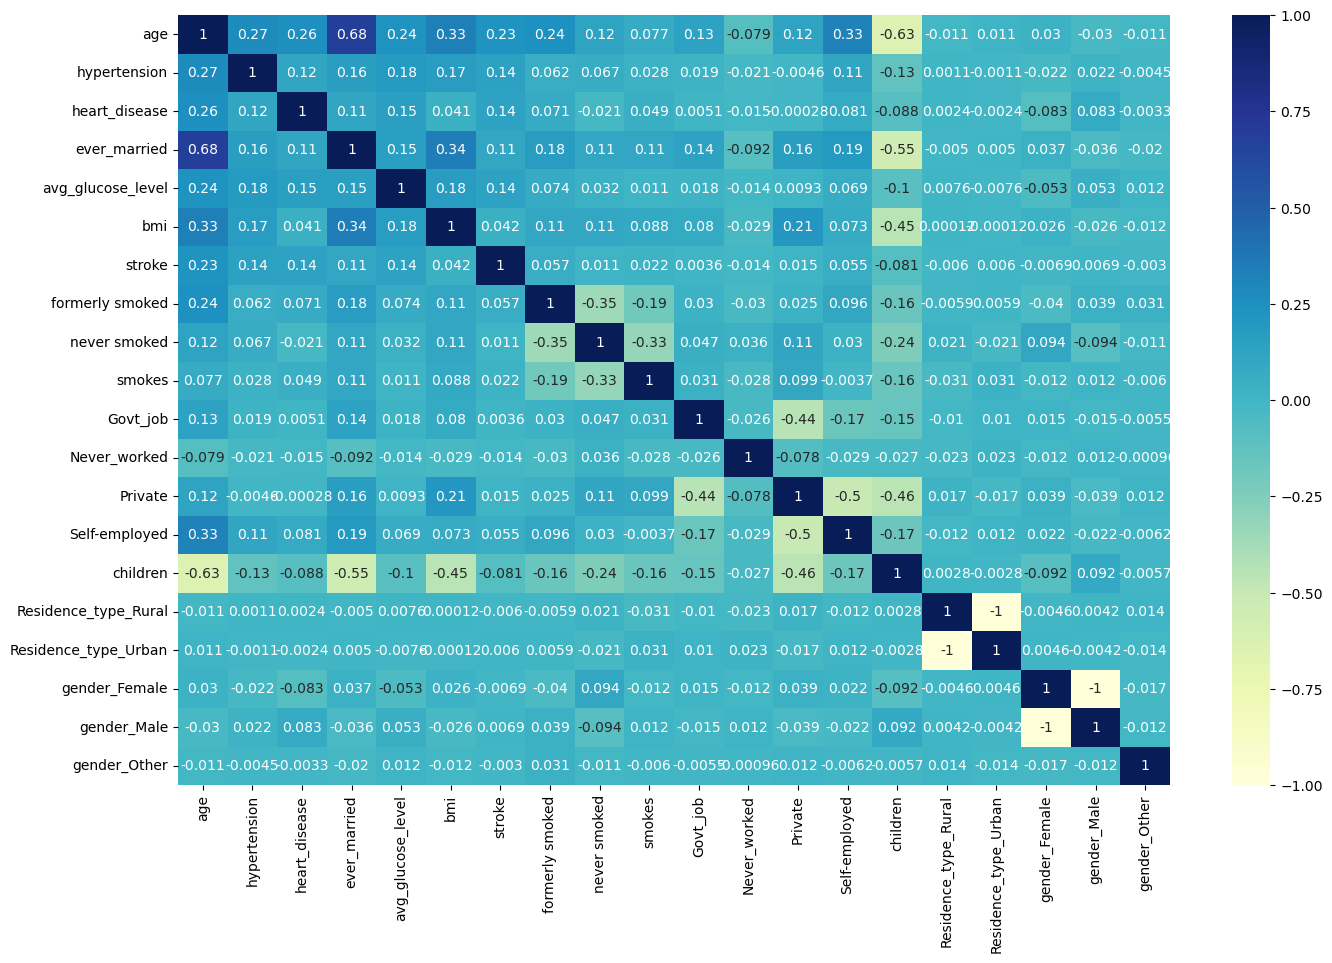

In [43]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Using Smote , we did Oversampling of our dataset to gain better results. As previously our dataset is skewed. We have 5% patients with stroke and 95% without stroke. This unbalance data create  unsignificant results. So to eliminate this we use SMOTE.  

In [44]:
from imblearn.over_sampling import SMOTE

class 0: (4700, 20)
class 1: (209, 20)
total values of 1 and 0: 0    4700
1    4700
Name: stroke, dtype: int64


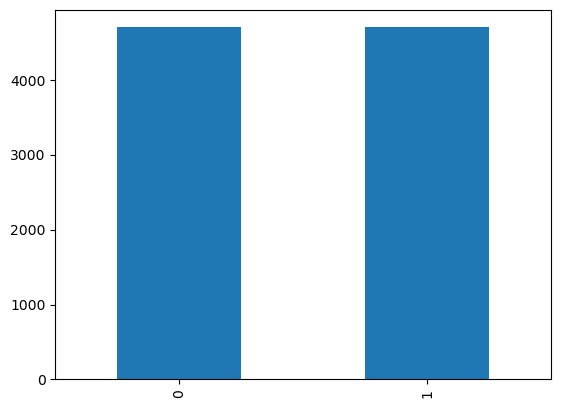

In [45]:
class_count_0, class_count_1 = df.stroke.value_counts()
# Separate class
class_0 = df[df.stroke == 0]
class_1 = df[df.stroke == 1]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
    
class_1_over = class_1.sample(class_count_0, replace=True)
df = pd.concat([class_0,class_1_over], axis=0)

print("total values of 1 and 0:",df.stroke.value_counts())

df.stroke.value_counts().plot(kind='bar')
plt.show()

In [46]:
# Putting feature variable to X
X = df.drop(['stroke'], axis=1)

X.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children,Residence_type_Rural,Residence_type_Urban,gender_Female,gender_Male,gender_Other
249,3.0,0,0,0,95.12,18.0,0,0,0,0,0,0,0,1,1,0,0,1,0
250,58.0,1,0,1,87.96,39.2,0,1,0,0,0,1,0,0,0,1,0,1,0
251,8.0,0,0,0,110.89,17.6,0,0,0,0,0,1,0,0,0,1,1,0,0
252,70.0,0,0,1,69.04,35.9,1,0,0,0,0,1,0,0,1,0,1,0,0
253,14.0,0,0,0,161.28,19.1,0,0,0,0,1,0,0,0,1,0,0,1,0


In [47]:
# Putting response variable to y
y = df['stroke']

y.head()

249    0
250    0
251    0
252    0
253    0
Name: stroke, dtype: int64

In [48]:
y.value_counts()

0    4700
1    4700
Name: stroke, dtype: int64

In [49]:
### Checking the Stroke Rate
st = (sum(df['stroke'])/len(df['stroke'].index))*100
st

50.0

## Data Preprocessing

In [50]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
x_train,x_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6580, 19)
(2820, 19)
(6580,)
(2820,)


# Using MinMaxScaler

## feature_range(0,1)

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['avg_glucose_level', 'bmi']

df[num_vars] = scaler.fit_transform(df[num_vars])

In [52]:
df

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children,Residence_type_Rural,Residence_type_Urban,gender_Female,gender_Male,gender_Other
249,3.0,0,0,0,0.184655,0.088202,0,0,0,0,0,0,0,0,1,1,0,0,1,0
250,58.0,1,0,1,0.151602,0.331042,0,0,1,0,0,0,1,0,0,0,1,0,1,0
251,8.0,0,0,0,0.257455,0.083620,0,0,0,0,0,0,1,0,0,0,1,1,0,0
252,70.0,0,0,1,0.064260,0.293242,0,1,0,0,0,0,1,0,0,1,0,1,0,0
253,14.0,0,0,0,0.490075,0.100802,0,0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,71.0,0,0,1,0.961130,0.325315,1,0,1,0,1,0,0,0,0,0,1,1,0,0
219,73.0,0,1,1,0.759902,0.209622,1,0,1,0,1,0,0,0,0,1,0,0,1,0
193,68.0,1,1,1,1.000000,0.238259,1,0,0,1,0,0,1,0,0,1,0,0,1,0
86,61.0,0,1,1,0.261703,0.194731,1,0,0,1,0,0,1,0,0,1,0,0,1,0


# Sklearn Logistic Regression

### **The Logistic Regression is an exmaple of supervised learning. This algorithm is used to predict the probability of a binary form (yes or no) by the previous observations.**

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [54]:
# Training data is used for model building
lr.fit(x_train, y_train)

LogisticRegression()

In [55]:
# Testing data is used for prediction
y_pred_logreg = lr.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_logreg)

0.7624113475177305

## Here we have split the data into train and test (70% training & 30% testing), after running this alogrithm we got an accuracy of 77%

# Libraries for Validation of models

In [57]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
logistic_confusion_matrix

array([[1022,  406],
       [ 264, 1128]], dtype=int64)

In [58]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_logreg):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_logreg)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_logreg)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
    plot_roc_curve(fpr, tpr)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1022  406]
 [ 264 1128]]
Accuracy: [0.76241135]
Sensitivity : [0.79471229]
Specificity : [0.73533246]
Precision: [0.71568627]
Recall: [0.79471229]
F-score: [0.75313191]
AUC: 0.7630155510480054
ROC curve:


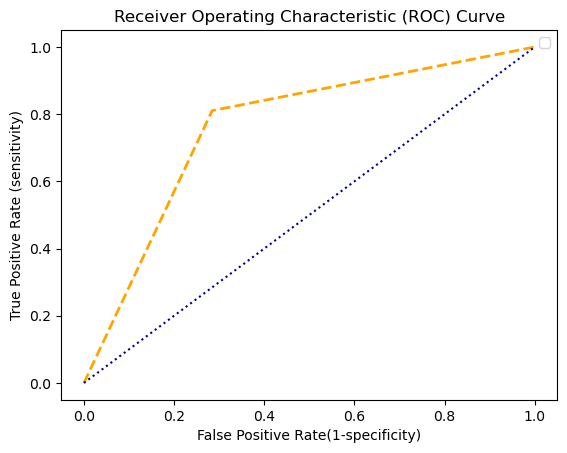

In [59]:
get_summary(y_test, y_pred_logreg)

## Observations:

### By looking at the ROC curve the model has acquired an accuracy of 77%.

# Stats Model

In [60]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 6580
Model:                            GLM   Df Residuals:                     6563
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3064.9
Date:                Mon, 17 Apr 2023   Deviance:                       6129.7
Time:                        10:56:49   Pearson chi2:                 6.17e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3654
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.1591   1.32e+04     -0.001      1.000   -2.58e+04    2.58e+04
age                      0.0787      0.003     31.228      0.000       0.074       0.084
hypertension             0.7421      0.086      8.588      0.000       0.573       0.911
heart_disease            0.4855      0.114      4.266      0.000       0.262       0.708
ever_married             0.0113      0.104      0.109      0.914      -0.192       0.214
avg_glucose_level        0.0029      0.001      4.619      0.000       0.002       0.004
bmi                      0.0201      0.005      4.018      0.000       0.010       0.030
formerly smoked          0.1874      0.102      1.833      0.067      -0.013       0.388
never smoked            -0.0232      0.094     -0.247      0.805      -0.207       0.161
smokes                   0.5353      0.108      4.957      0.000       0.324       0.747
Govt_job                 2.0231   4245.149      0.000      1.000   -8318.316    8322.363
Never_worked           -17.6733   1.55e+04     -0.001      0.999   -3.03e+04    3.03e+04
Private                  2.2810   4245.149      0.001      1.000   -8318.059    8322.621
Self-employed            1.9767   4245.149      0.000      1.000   -8318.363    8322.316
children                 3.2335   4245.149      0.001      0.999   -8317.106    8323.573
Residence_type_Rural    -4.0725   6577.099     -0.001      1.000   -1.29e+04    1.29e+04
Residence_type_Urban    -4.0866   6577.099     -0.001      1.000   -1.29e+04    1.29e+04
gender_Female            4.3111   2.22e+04      0.000      1.000   -4.34e+04    4.34e+04
gender_Male              4.2500   2.22e+04      0.000      1.000   -4.34e+04    4.34e+04
gender_Other           -16.7201   5.73e+04     -0.000      1.000   -1.12e+05    1.12e+05
========================================================================================
"""

In [61]:
## Feature selection using RFE(Recursive feature elimination)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select = 15)            
rfe = rfe.fit(x_train, y_train)

In [62]:
rfe.support_

array([ True,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False])

In [63]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('age', True, 1),
 ('hypertension', True, 1),
 ('heart_disease', True, 1),
 ('ever_married', False, 3),
 ('avg_glucose_level', False, 5),
 ('bmi', True, 1),
 ('formerly smoked', True, 1),
 ('never smoked', False, 2),
 ('smokes', True, 1),
 ('Govt_job', True, 1),
 ('Never_worked', True, 1),
 ('Private', True, 1),
 ('Self-employed', True, 1),
 ('children', True, 1),
 ('Residence_type_Rural', True, 1),
 ('Residence_type_Urban', True, 1),
 ('gender_Female', True, 1),
 ('gender_Male', True, 1),
 ('gender_Other', False, 4)]

In [64]:
col = x_train.columns[rfe.support_]

In [65]:
# Features of no significance to our results. So we will eliminate these
x_train.columns[~rfe.support_]

Index(['ever_married', 'avg_glucose_level', 'never smoked', 'gender_Other'], dtype='object')

In [66]:
# Assessing the model with stats model
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 6580
Model:                            GLM   Df Residuals:                     6566
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3075.8
Date:                Mon, 17 Apr 2023   Deviance:                       6151.6
Time:                        10:56:50   Pearson chi2:                 6.17e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3632
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -17.8618   4.68e+04     -0.000      1.000   -9.17e+04    9.17e+04
age                      0.0810      0.002     32.963      0.000       0.076       0.086
hypertension             0.7718      0.085      9.052      0.000       0.605       0.939
heart_disease            0.5687      0.112      5.070      0.000       0.349       0.789
bmi                      0.0266      0.005      5.552      0.000       0.017       0.036
formerly smoked          0.2064      0.078      2.638      0.008       0.053       0.360
smokes                   0.5545      0.087      6.378      0.000       0.384       0.725
Govt_job                 0.0555   9905.181    5.6e-06      1.000   -1.94e+04    1.94e+04
Never_worked           -19.5754   1.79e+04     -0.001      0.999   -3.51e+04    3.51e+04
Private                  0.3090   9905.181   3.12e-05      1.000   -1.94e+04    1.94e+04
Self-employed           -0.0248   9905.181   -2.5e-06      1.000   -1.94e+04    1.94e+04
children                 1.3738   9905.181      0.000      1.000   -1.94e+04    1.94e+04
Residence_type_Rural    -8.9213   2.34e+04     -0.000      1.000   -4.59e+04    4.58e+04
Residence_type_Urban    -8.9405   2.34e+04     -0.000      1.000   -4.59e+04    4.58e+04
gender_Female           20.8240   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
gender_Male             20.7836   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
========================================================================================
"""

In [67]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

514     0.266414
239     0.773509
235     0.711564
248     0.766592
239     0.773509
9       0.784540
4033    0.801071
3537    0.110299
245     0.067254
23      0.915640
dtype: float64

In [68]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26641354, 0.77350871, 0.71156353, 0.76659208, 0.77350871,
       0.78454011, 0.80107062, 0.11029884, 0.06725414, 0.91563979])

In [69]:
# creating a dataframe with actual stroke flag and predicted probabilities
y_train_pred_final = pd.DataFrame({'stroke':y_train.values, 'stroke_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,stroke,stroke_Prob,CustID
0,0,0.266414,514
1,1,0.773509,239
2,1,0.711564,235
3,1,0.766592,248
4,1,0.773509,239


In [70]:
y_train_pred_final['predicted'] = y_train_pred_final.stroke_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,stroke,stroke_Prob,CustID,predicted
0,0,0.266414,514,0
1,1,0.773509,239,1
2,1,0.711564,235,1
3,1,0.766592,248,1
4,1,0.773509,239,1


In [71]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.stroke, y_train_pred_final.predicted )
print(confusion)

[[2409  863]
 [ 611 2697]]


In [72]:
# Let's check the overall accuracy.
LR=(metrics.accuracy_score(y_train_pred_final.stroke, y_train_pred_final.predicted))
LR

0.7759878419452888

# SVM

## SVM (Support Vector Machine) has the capability to handle both classification and regression on linear and non-linear data. It is based on the  geometrical properties of the data.

In [73]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [74]:
y_pred_svc = svc.predict(x_test)
svm=accuracy_score(y_test, y_pred_svc)
svm

0.7528368794326241

In [75]:
SVM_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
SVM_confusion_matrix

array([[ 990,  438],
       [ 259, 1133]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[ 990  438]
 [ 259 1133]]
Accuracy: [0.75283688]
Sensitivity : [0.79263411]
Specificity : [0.72119669]
Precision: [0.69327731]
Recall: [0.79263411]
F-score: [0.73963392]
AUC: 0.7536070462667825
ROC curve:


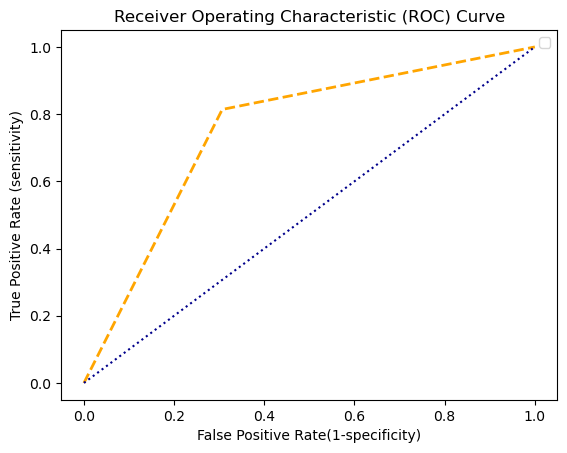

In [76]:
get_summary(y_test, y_pred_svc)

## Observations:

### By looking at the ROC curve the model has acquired an accuracy of 75%.

# Naive Bayes 

### The Naive Bayes is a classification algorithm that is suitable for binary and multiclass classification. Naïve Bayes performs well in cases of categorical input variables compared to numerical variables. It is useful for making predictions and forecasting data based on historical results.

In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [78]:
y_pred_gnb = gnb.predict(x_test)
nv=accuracy_score(y_test,y_pred_gnb)
nv

0.6429078014184397

In [79]:
gnb_confusion_matrix = confusion_matrix(y_test, y_pred_gnb)
gnb_confusion_matrix

array([[ 422, 1006],
       [   1, 1391]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[ 422 1006]
 [   1 1391]]
Accuracy: [0.6429078]
Sensitivity : [0.99763593]
Specificity : [0.58030872]
Precision: [0.29551821]
Recall: [0.99763593]
F-score: [0.45596975]
AUC: 0.6473999082391577
ROC curve:


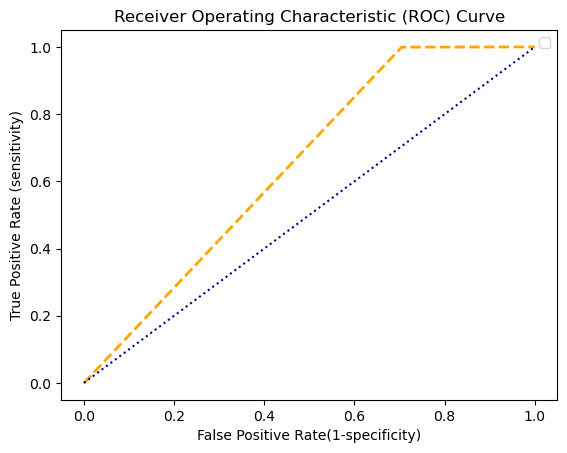

In [80]:
get_summary(y_test, y_pred_gnb)

## Observations:

### By looking at the ROC curve the model has acquired an accuracy of 64%.

# KNN

### K-nearest neighbors (kNN) is a supervised machine learning algorithm that can be used to solve both classification and regression tasks.

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [82]:
y_pred_knn = knn.predict(x_test)
knn=accuracy_score(y_test, y_pred_knn)
knn

0.9304964539007092

In [83]:
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_confusion_matrix

array([[1232,  196],
       [   0, 1392]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1232  196]
 [   0 1392]]
Accuracy: [0.93049645]
Sensitivity : [1.]
Specificity : [0.87657431]
Precision: [0.8627451]
Recall: [1.]
F-score: [0.92631579]
AUC: 0.9313725490196079
ROC curve:


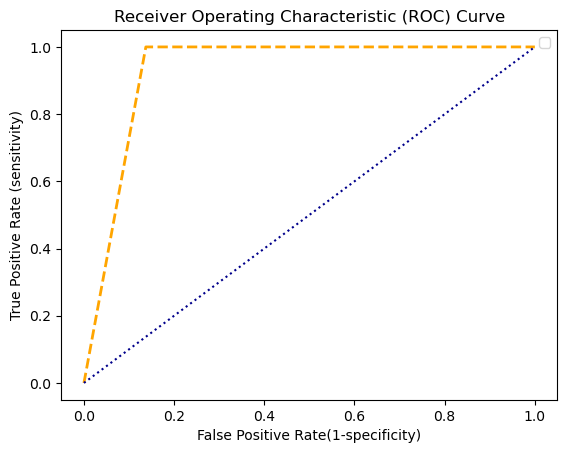

In [84]:
get_summary(y_test, y_pred_knn)

## Observations:

### By looking at the ROC curve the model has acquired an accuracy of 93%.

# Decision Tree


### A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

In [85]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [86]:
y_pred_dtree = dtree.predict(x_test)
dt=accuracy_score(y_test, y_pred_dtree)
dt

0.9691489361702128

In [87]:
dtree_confusion_matrix = confusion_matrix(y_test, y_pred_dtree)
dtree_confusion_matrix

array([[1341,   87],
       [   0, 1392]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1341   87]
 [   0 1392]]
Accuracy: [0.96914894]
Sensitivity : [1.]
Specificity : [0.94117647]
Precision: [0.93907563]
Recall: [1.]
F-score: [0.96858072]
AUC: 0.9695378151260504
ROC curve:


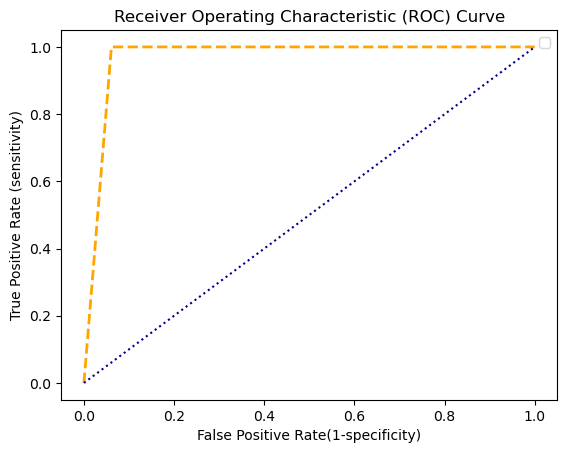

In [88]:
get_summary(y_test, y_pred_dtree)

## Observations:

### By looking at the ROC curve the model has acquired an accuracy of 96%.

# Random Forest

### Random Forest is a powerful supervised algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems.

In [89]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [90]:
y_pred_rfc = rfc.predict(x_test)
rf=accuracy_score(y_test, y_pred_rfc)
rf

0.9907801418439717

In [91]:
RandomForest_confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
RandomForest_confusion_matrix

array([[1402,   26],
       [   0, 1392]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1402   26]
 [   0 1392]]
Accuracy: [0.99078014]
Sensitivity : [1.]
Specificity : [0.98166432]
Precision: [0.98179272]
Recall: [1.]
F-score: [0.99081272]
AUC: 0.9908963585434173
ROC curve:


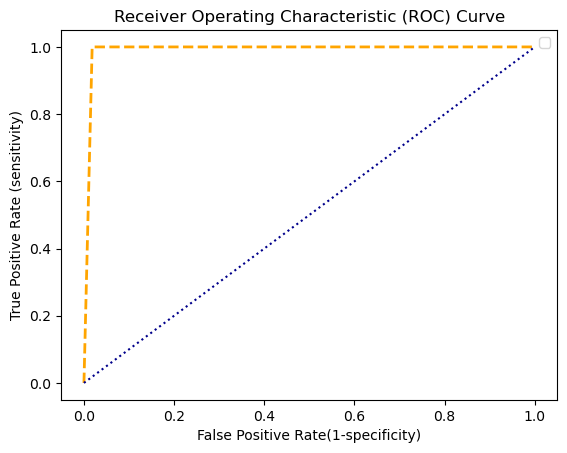

In [92]:
get_summary(y_test, y_pred_rfc)

## Observations:

### By looking at the ROC curve the model has acquired an accuracy of 98%.

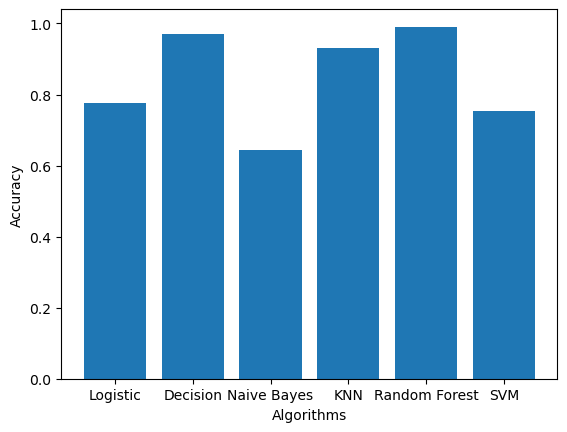

In [93]:
plt.bar(['Logistic','Decision','Naive Bayes','KNN','Random Forest','SVM'],[LR,dt,nv,knn,rf,svm])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

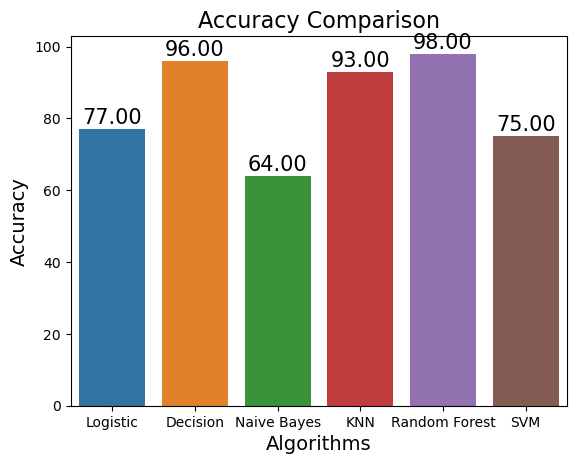

In [94]:
lx = ['Logistic','Decision','Naive Bayes','KNN','Random Forest','SVM']
ly = [77,96,64,93,98,75]
plots = sns.barplot(x=lx,y=ly)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Algorithms", size=14)
 
# Setting the label for y-axis
plt.ylabel("Accuracy", size=14)
 
# Setting the title for the graph
plt.title("Accuracy Comparison",size=16)
 
# Finally showing the plot
plt.show()

#### From the above picture the highest accuracy by Random Forest Classification by comparing the other Machine Learning Algorithms

# ***$Thank You$***